In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
import pandas as pd
from ide_utils.input_tables import load_dask
from ide_utils.output_table import send_to_output_table

data = load_dask("data").compute().drop('__index_level_0__', axis=1)
df = data

# Correlaciones

## 2. Análisis de correlaciones por líneas en general.
data imputada

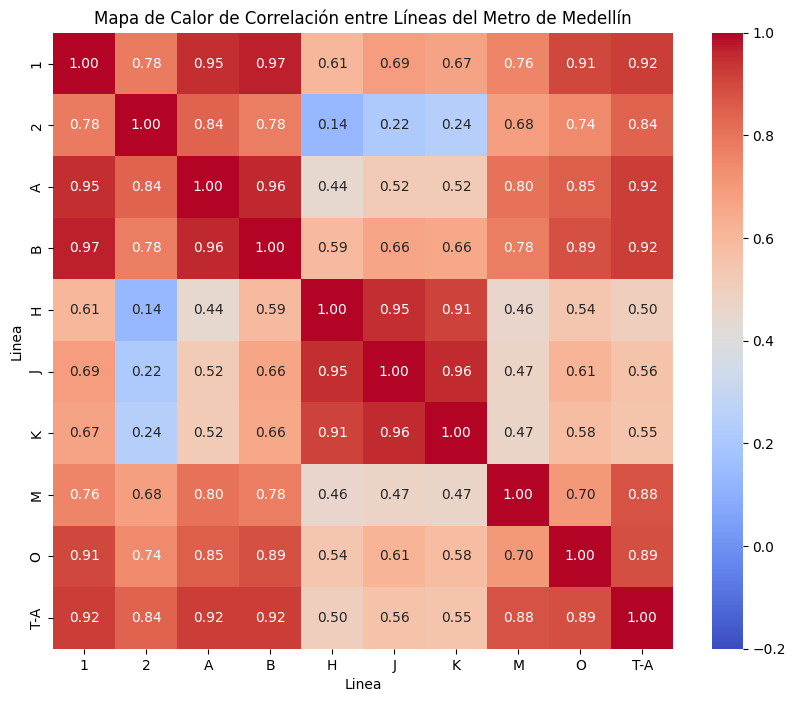

In [10]:
# Reestructurando los datos para que cada línea sea una columna y cada fila represente un registro diferente
restructured_df = df.pivot_table(index=['Fecha','Horas'], columns='Linea', values='Qty_passangers')

# Calculando la matriz de correlación para las líneas en general
correlation_matrix_general = restructured_df.corr()

# Creando un mapa de calor para la matriz de correlación general entre las líneas
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_general, annot=True, cmap='coolwarm', fmt='.2f', vmax=1, vmin=-0.2)
plt.title('Mapa de Calor de Correlación entre Líneas del Metro de Medellín')
plt.show()

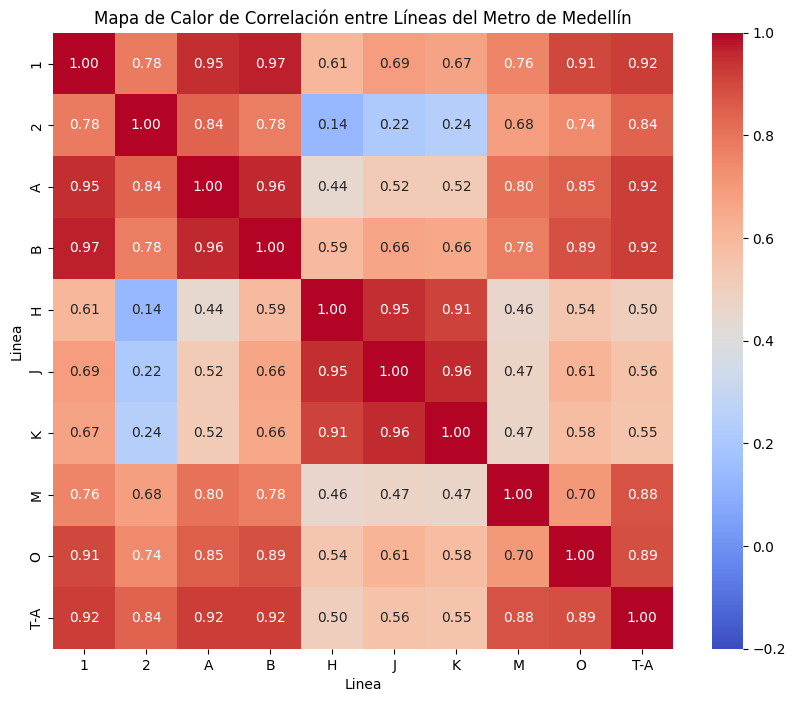

In [11]:
# Reestructurando los datos para que cada línea sea una columna y cada fila represente un registro diferente
restructured_df = df.pivot_table(index=['Fecha','Horas'], columns='Linea', values='Qty_passangers')

# Calculando la matriz de correlación para las líneas en general
correlation_matrix_general = restructured_df.corr()

# Creando un mapa de calor para la matriz de correlación general entre las líneas
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_general, annot=True, cmap='coolwarm', fmt='.2f', vmax=1, vmin=-0.2)
plt.title('Mapa de Calor de Correlación entre Líneas del Metro de Medellín')
plt.show()

# 4. Correlaciones entre horarios

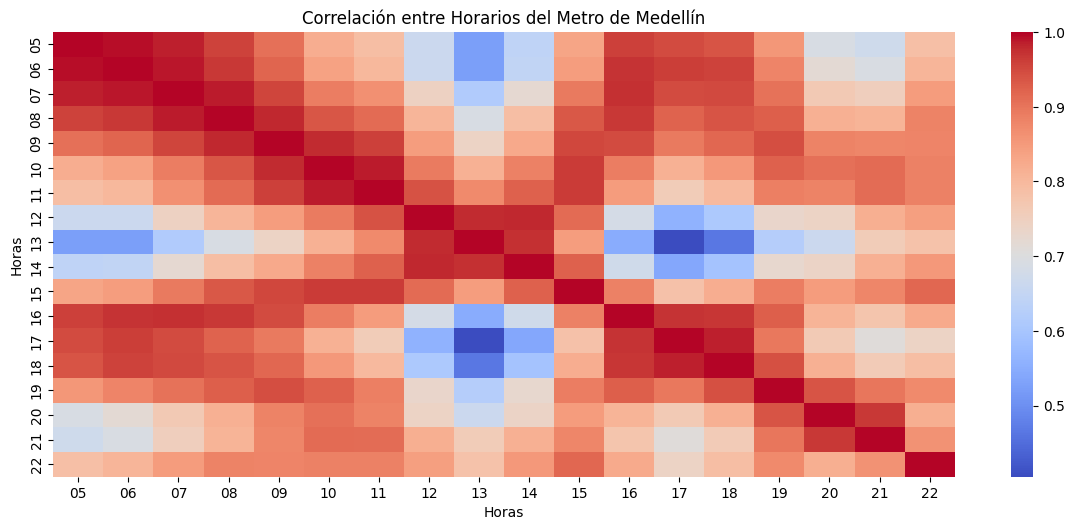

In [12]:
# Correlaciones entre Horarios
# Agrupando por fecha y hora
grouped_by_time = df.groupby(['Fecha', 'Horas'])['Qty_passangers'].sum().unstack()
# Calculando la matriz de correlación para las diferentes horas del día
correlation_matrix_time = grouped_by_time.corr()

plt.figure(figsize=(12, 10))
plt.subplot(2, 1, 1)
sns.heatmap(correlation_matrix_time, annot=False, cmap='coolwarm', fmt='.2f')
plt.title('Correlación entre Horarios del Metro de Medellín')
plt.tight_layout()
plt.show()

In [ ]:
grouped_by_time

Horas            5        6        7        8        9        10       11  \
Fecha                                                                       
2021-01-01   7347.0   6527.0   3818.0   1772.0   1749.0   1611.0   1854.0   
2021-01-02  14902.0  14259.0   9493.5   5064.0   4691.0   4824.0   5358.0   
2021-01-03  11493.0  13708.0  11538.0   9606.0  14128.0  15854.0  15964.0   
2021-01-04  41072.0  49473.0  38917.0  26299.0  24129.0  22983.0  23407.0   
2021-01-05  42324.0  51419.0  40743.0  28461.0  24707.0  22961.0  22949.0   
...             ...      ...      ...      ...      ...      ...      ...   
2023-06-26  70403.0  91051.0  76206.0  48603.0  40174.0  36719.0  37897.0   
2023-06-27  71726.0  94607.0  77878.0  51220.0  42527.0  38724.0  39973.0   
2023-06-28  70202.0  93700.0  78580.0  51218.0  42645.0  38811.0  39204.0   
2023-06-29  70675.0  93898.0  76954.0  50579.0  42035.0  38625.0  39386.0   
2023-06-30  68892.0  90578.0  76073.0  51362.0  44017.0  40138.0  41103.0   

Horas            12       13       14       15       16        17       18  \
Fecha                                                                        
2021-01-01   2025.0   2233.0   2572.0   3091.0   4694.0    5194.0   5204.0   
2021-01-02   6830.0   7158.0   8162.0   7892.0   8879.0    8129.0   8521.0   
2021-01-03  15962.0  17038.0  17959.0  17937.0  19385.0   20269.0  18606.0   
2021-01-04  25021.0  24202.0  30273.0  32123.0  46007.0   58288.0  47134.0   
2021-01-05  24547.0  24184.0  30190.0  32343.0  47998.0   61581.0  49558.0   
...             ...      ...      ...      ...      ...       ...      ...   
2023-06-26  42443.0  40784.0  49844.0  52828.0  81262.0  111783.0  80962.0   
2023-06-27  42767.0  41454.0  49818.0  53869.0  82812.0  113090.0  84017.0   
2023-06-28  43226.0  41058.0  49612.0  53661.0  82861.0  112594.0  80505.0   
2023-06-29  42556.0  40665.0  48716.0  53845.0  81965.0  111712.0  80728.0   
2023-06-30  44581.0  42799.0  51012.0  60405.0  84148.0  102634.0  80258.0   

Horas            19       20       21       22  
Fecha                                           
2021-01-01   3520.0   2052.0    543.0    839.0  
2021-01-02   5908.0   4424.0    162.0    899.5  
2021-01-03  15899.0  14214.0   9202.0    855.0  
2021-01-04  26747.0  17678.0  13917.0   6774.0  
2021-01-05  27725.0  17924.0  14641.0   6794.0  
...             ...      ...      ...      ...  
2023-06-26  46417.0  30334.0  22573.0  12283.0  
2023-06-27  47776.0  32128.0  26207.0  13454.0  
2023-06-28  48967.0  32397.0  25025.0  13735.0  
2023-06-29  48799.0  33262.0  24648.0  13876.0  
2023-06-30  55656.0  36732.0  29822.0  18666.0  

[911 rows x 18 columns]

# 5. Análisis estacional

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Convertir la columna 'Fecha' a formato de fecha
df['Fecha'] = pd.to_datetime(df['Fecha'])

# Agregar columnas para mes y año para facilitar el análisis estacional
df['Mes'] = df['Fecha'].dt.month
df['Año'] = df['Fecha'].dt.year

# Agrupar los datos por mes y año para calcular la media de pasajeros
afluencia_mensual = df.groupby(['Año', 'Mes']).mean().reset_index()


## Correlación de eventos con datos del dataset (eventos especiales)

In [14]:
# Vamos a correlacionar los eventos y vacaciones con los datos del dataset.

# Primero, necesitamos definir los meses aproximados de los eventos y vacaciones:
eventos_meses = {
    'Navidad/Año Nuevo': [12, 1],  # Diciembre y Enero
    'Semana Santa': [3, 4],       # Marzo o Abril, varía cada año
    'Feria de las Flores': [8],   # Agosto
    'Vacaciones Escolares': [6, 7, 10],  # Junio, Julio, Octubre
    'Día de la Independencia': [7]       # 20 de Julio
}

# Crear un DataFrame para cada evento/vacaciones
eventos_data = {}

for evento, meses in eventos_meses.items():
    eventos_data[evento] = afluencia_mensual[afluencia_mensual['Mes'].isin(meses)]

# Calcular la media de pasajeros para cada evento/vacaciones
media_pasajeros_eventos = {evento: df['Qty_passangers'].mean() for evento, df in eventos_data.items()}

media_pasajeros_eventos



{'Navidad/Año Nuevo': 4030.4470609318996,
 'Semana Santa': 4177.882761847869,
 'Feria de las Flores': 4466.848924731183,
 'Vacaciones Escolares': 4327.04366481217,
 'Día de la Independencia': 4092.029127837515}

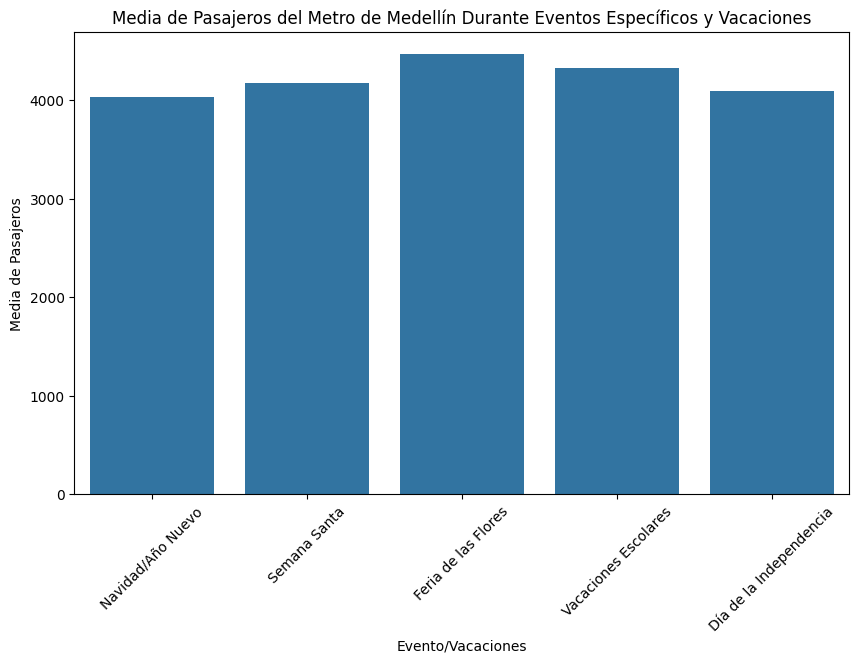

In [15]:
# Creando un gráfico de barras para visualizar la media de pasajeros en los eventos y vacaciones específicos

# Convertir el diccionario en DataFrame para el gráfico
df_media_eventos = pd.DataFrame(list(media_pasajeros_eventos.items()), columns=['Evento', 'Media Pasajeros'])

# Crear el gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x='Evento', y='Media Pasajeros', data=df_media_eventos)
plt.title('Media de Pasajeros del Metro de Medellín Durante Eventos Específicos y Vacaciones')
plt.xticks(rotation=45)
plt.ylabel('Media de Pasajeros')
plt.xlabel('Evento/Vacaciones')
plt.show()

# 6. Correlaciones de afluencia promedio semanal entre líneas

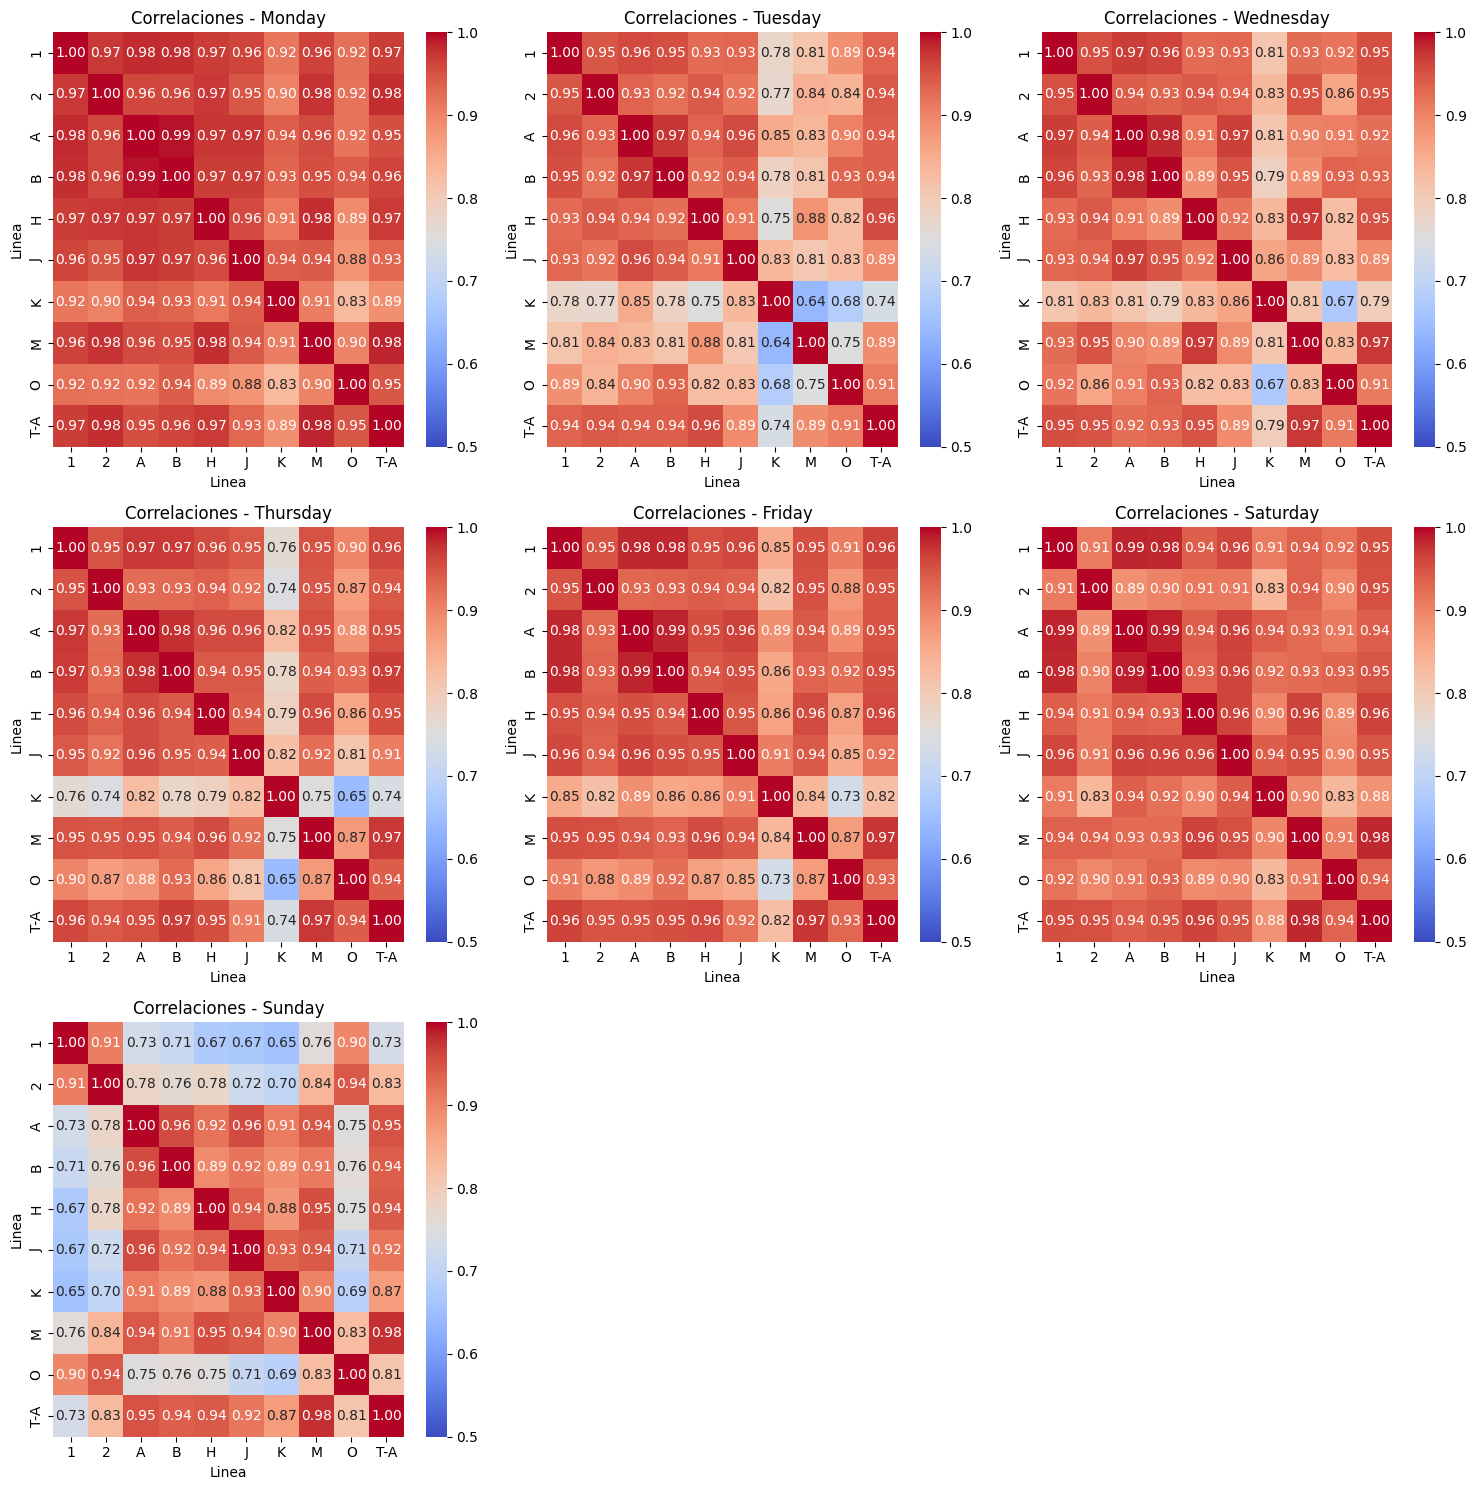

In [16]:
data = df

# Preparación de los datos
data['Fecha'] = pd.to_datetime(data['Fecha'])
data['Dia_semana'] = data['Fecha'].dt.day_name()

# Agrupación y pivoteo de los datos para cada día de la semana
afluencia_por_dia = data.groupby(['Dia_semana', 'Linea', 'Fecha']).agg({'Qty_passangers': 'sum'}).reset_index()

# Creando un diccionario para almacenar las matrices de correlación para cada día de la semana
correlaciones_por_dia = {}
orden_dias = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Calculando las correlaciones para cada día de la semana
for dia in orden_dias:
    # Filtrando los datos para el día específico
    data_dia = afluencia_por_dia[afluencia_por_dia['Dia_semana'] == dia]

    # Pivotando los datos
    pivot_dia = data_dia.pivot_table(index='Fecha', columns='Linea', values='Qty_passangers')

    # Calculando la matriz de correlación para el día
    correlaciones_por_dia[dia] = pivot_dia.corr()

# Graficando las matrices de correlación para cada día de la semana
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
axes = axes.flatten()  # Aplanando la matriz de ejes para iterar fácilmente

# Graficando cada matriz de correlación
for i, dia in enumerate(orden_dias):
    sns.heatmap(correlaciones_por_dia[dia], ax=axes[i], annot=True, fmt=".2f", cmap="coolwarm", vmin=0.5, vmax=1)
    axes[i].set_title(f"Correlaciones - {dia}")

# Ajustando el layout y eliminando los ejes adicionales
for i in range(len(orden_dias), 9):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


## 6.1 Correlaciones de afluencia promedio semanal entre líneas, gráfico por año.

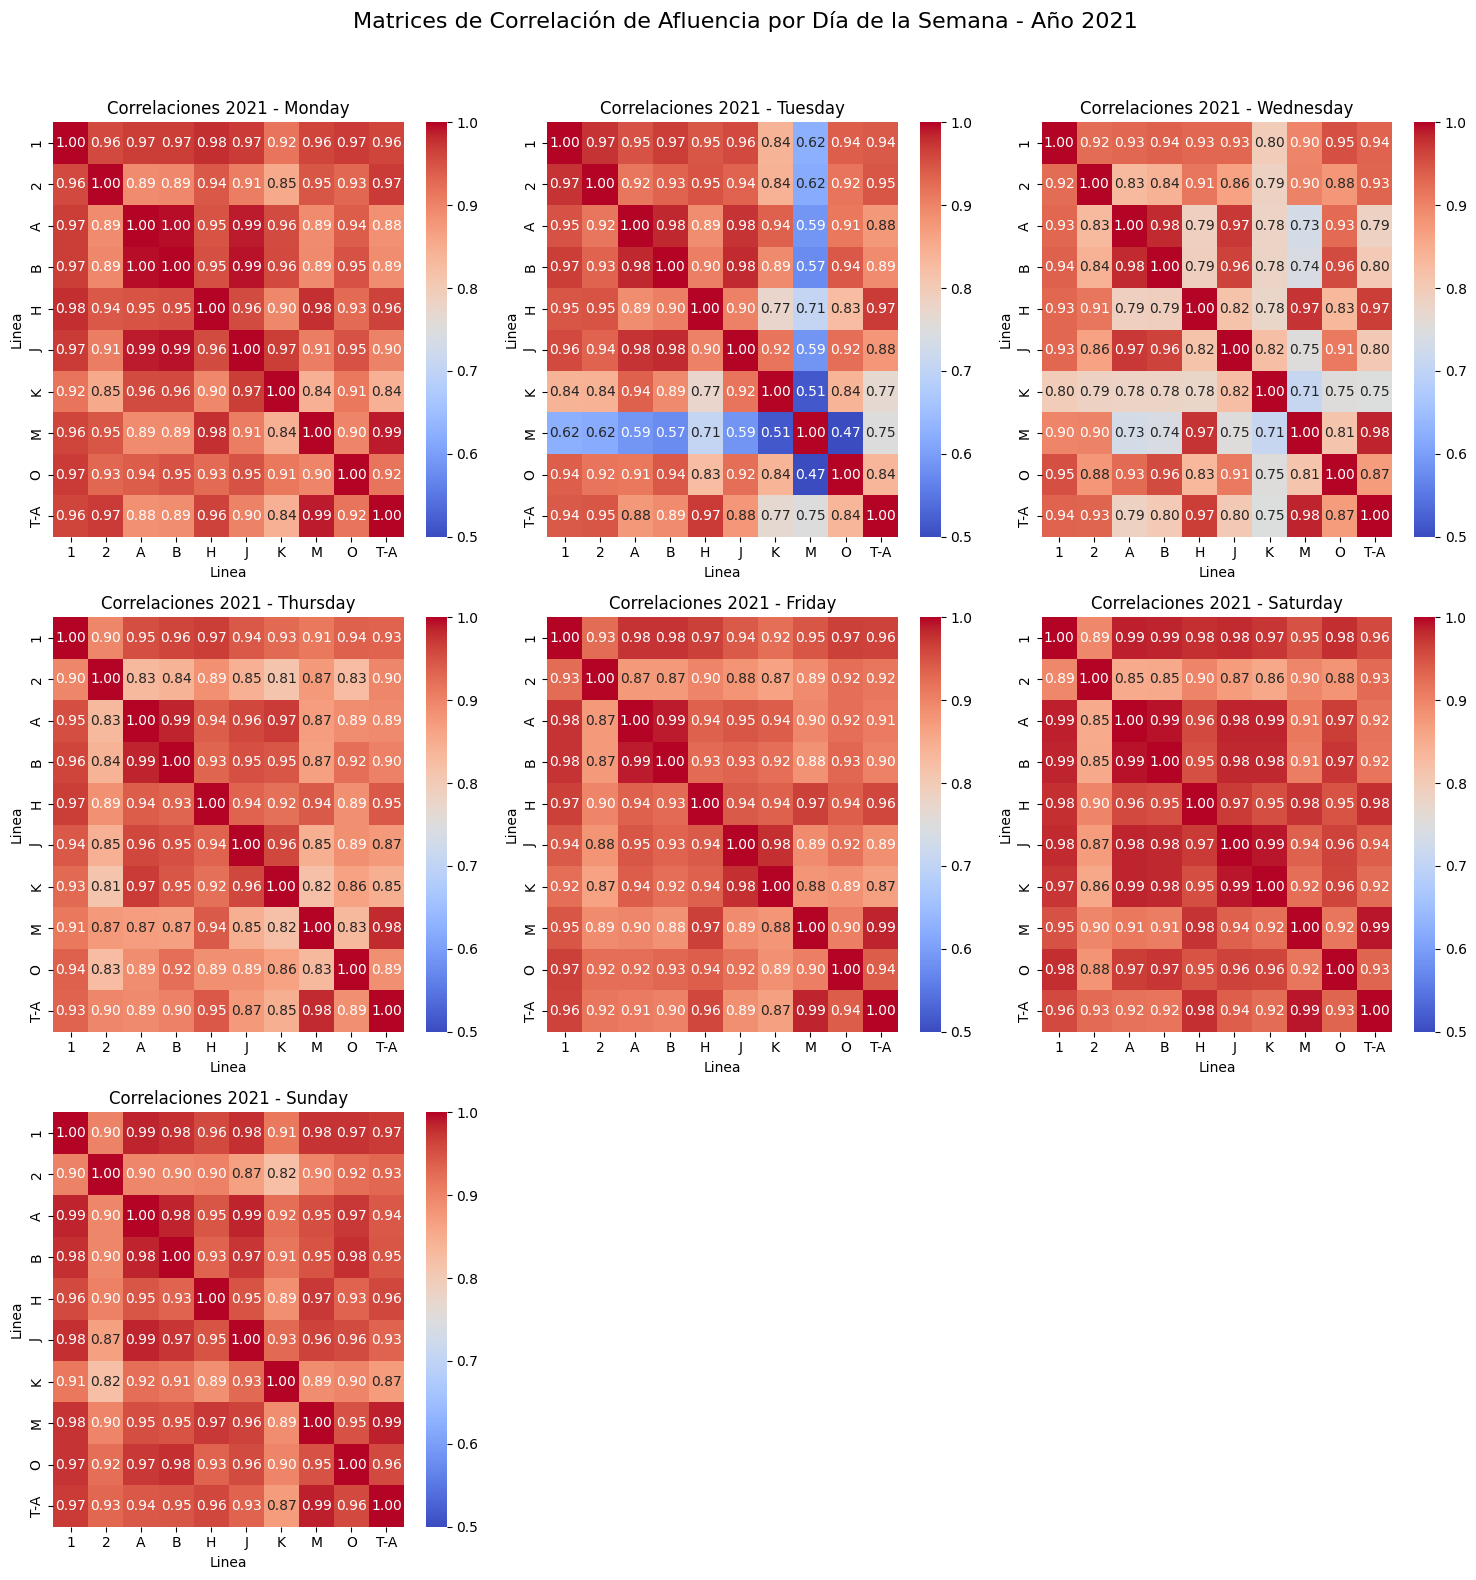

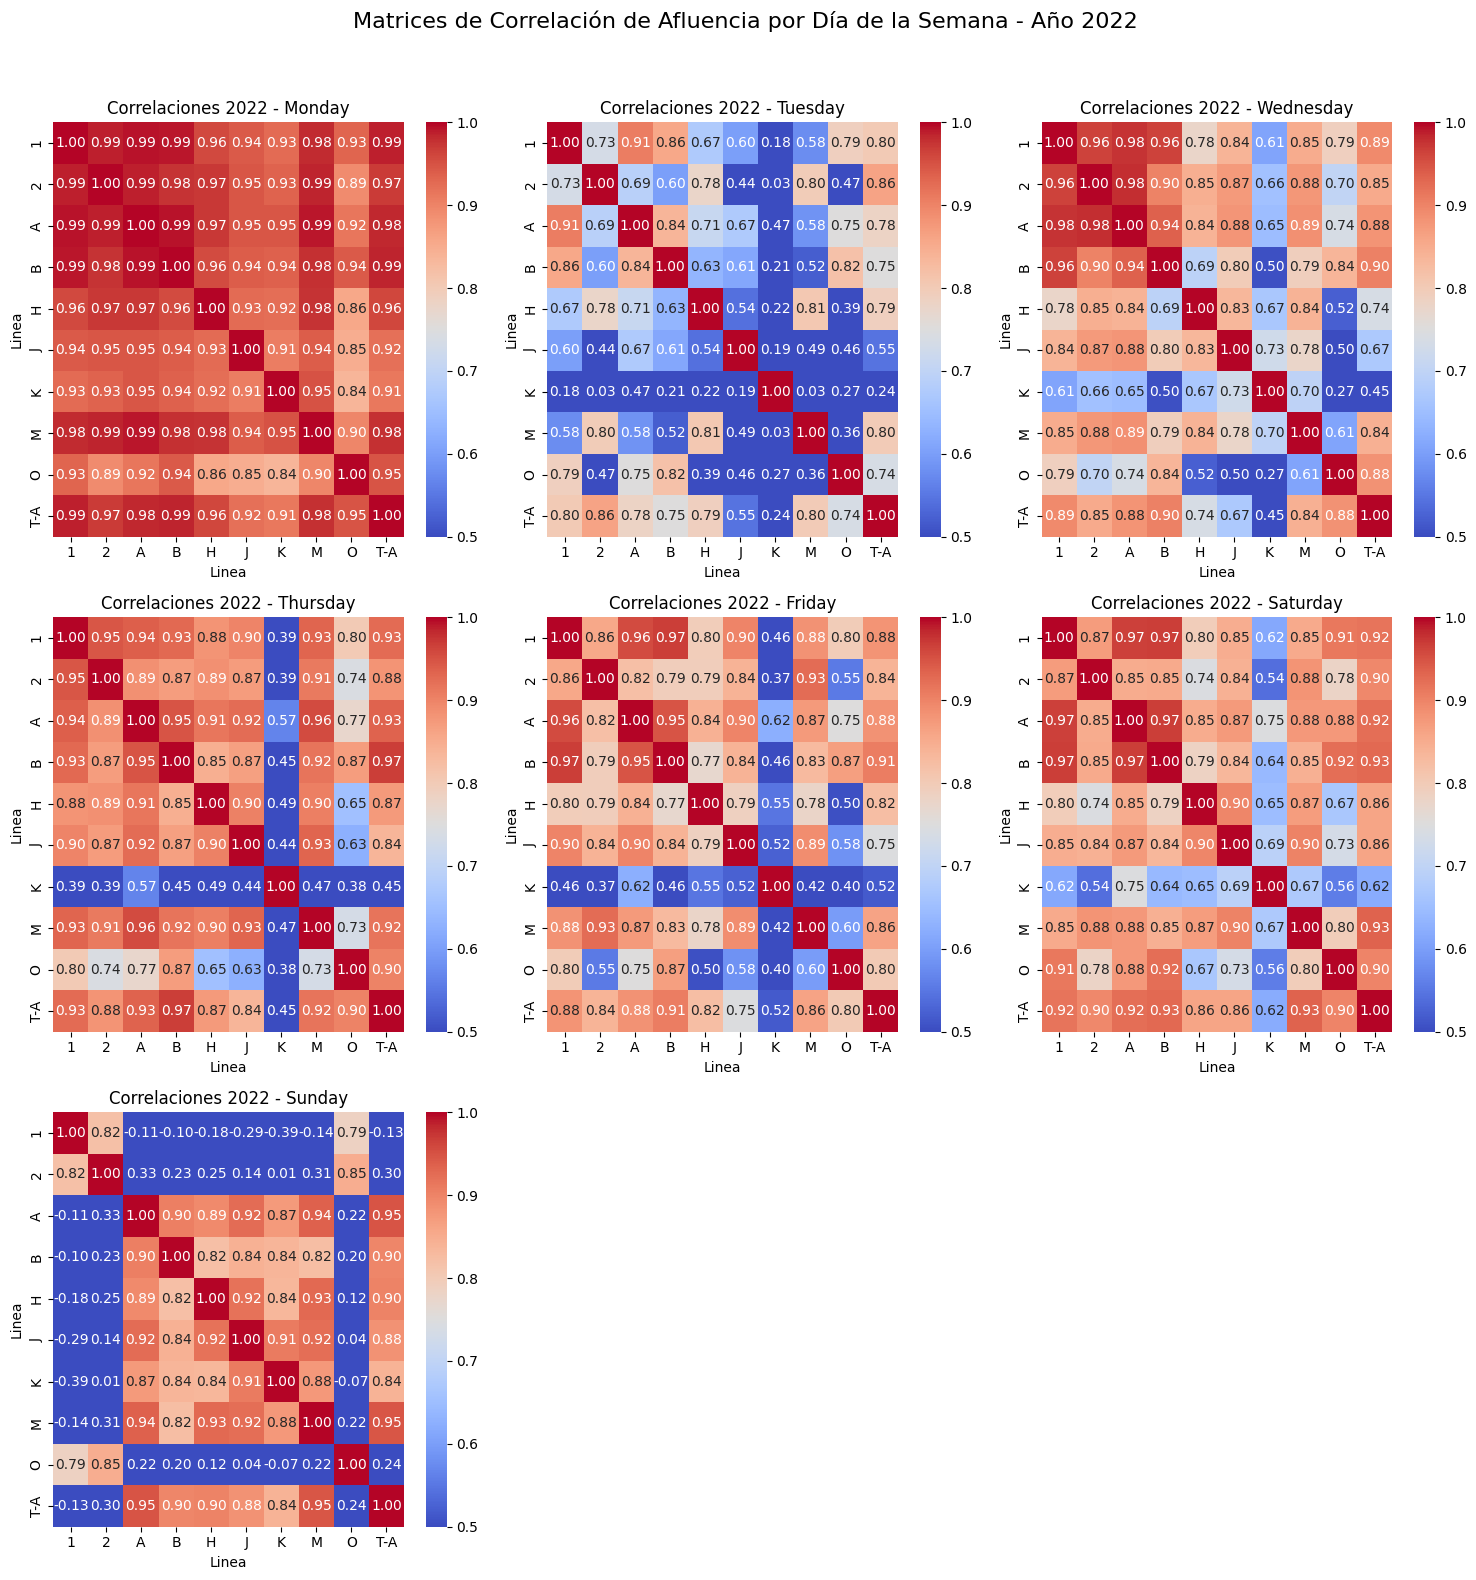

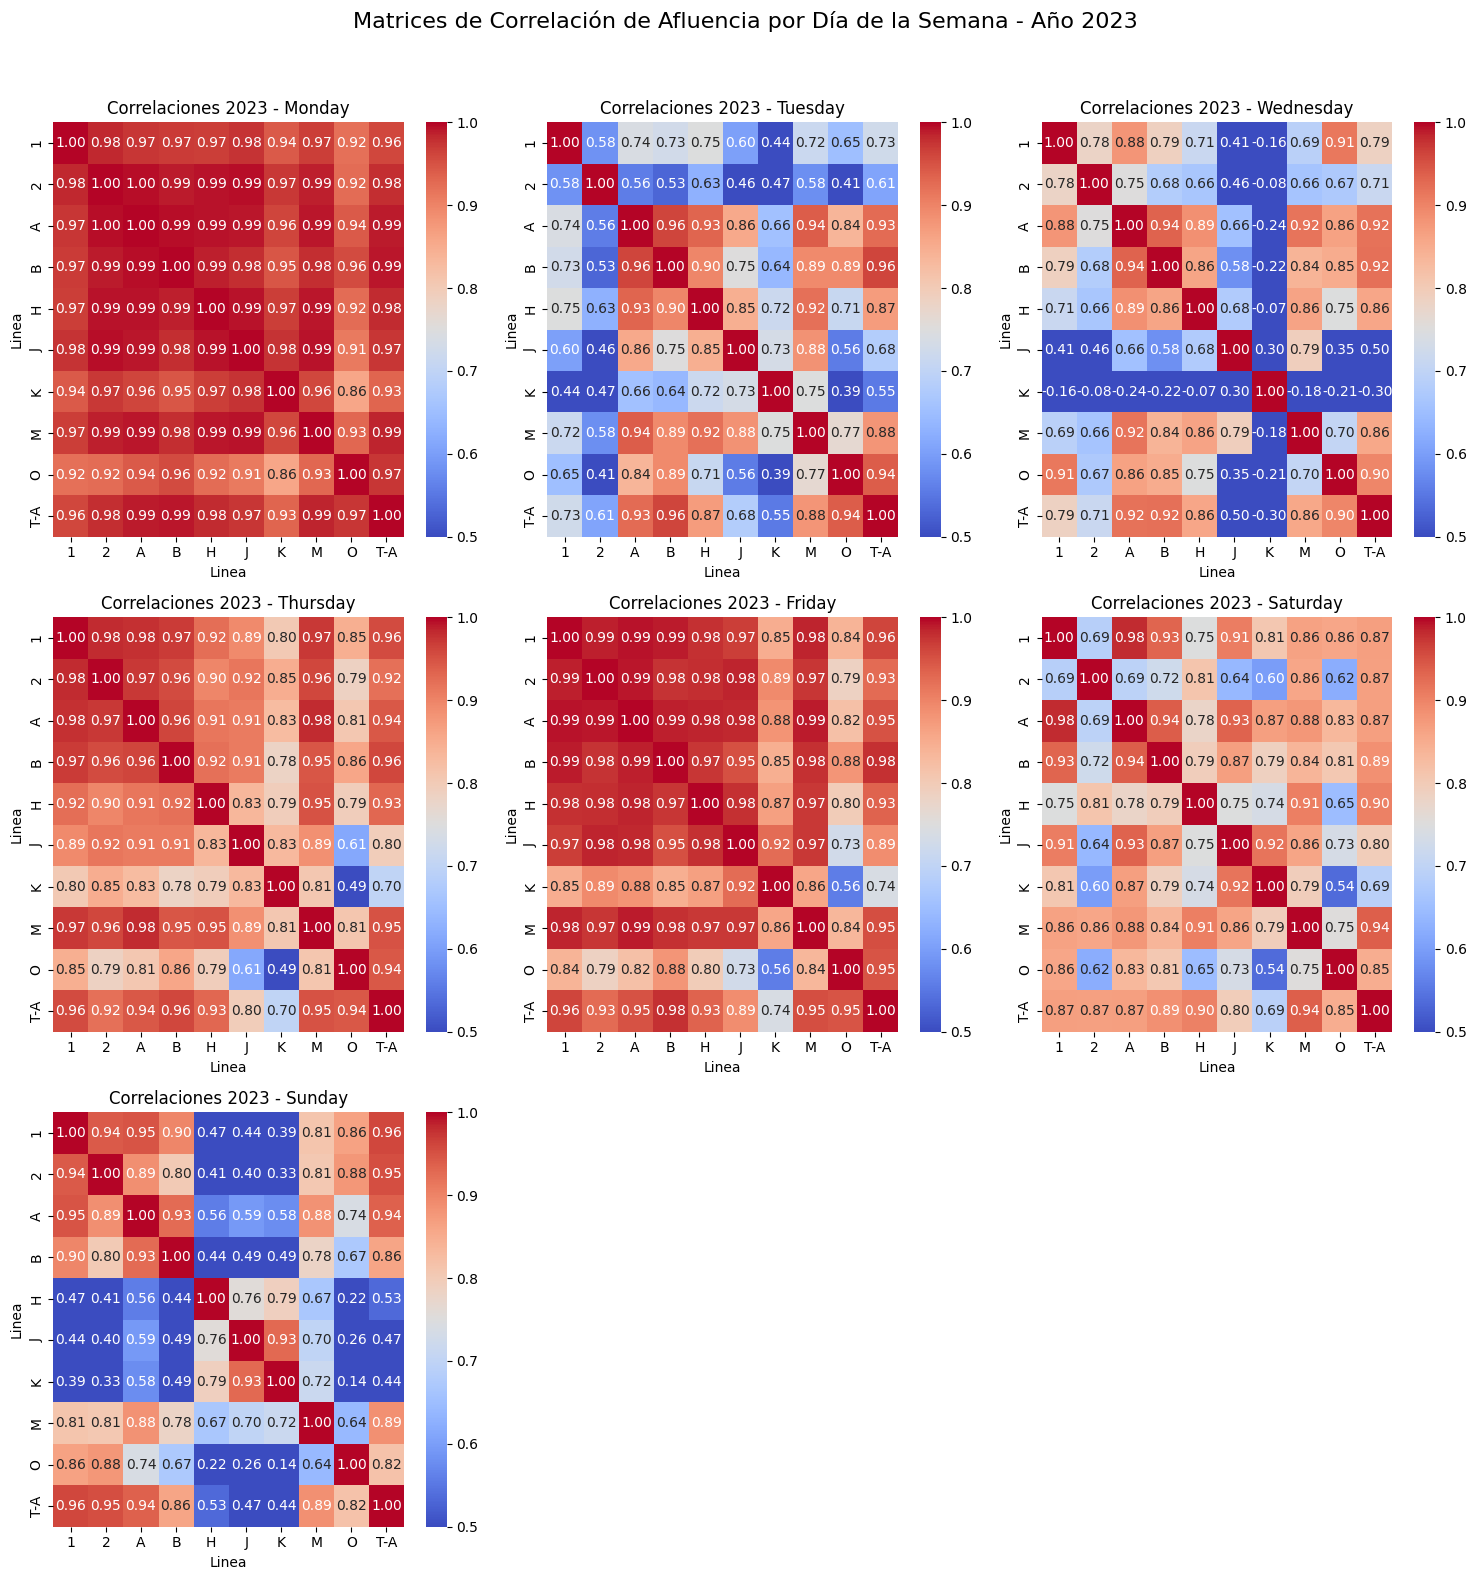

In [17]:


# Preparación de los datos
data['Fecha'] = pd.to_datetime(data['Fecha'])
data['Dia_semana'] = data['Fecha'].dt.day_name()
data['Año'] = data['Fecha'].dt.year

# Agrupación y pivoteo de los datos por año, día de la semana, línea del metro y fecha
afluencia_por_dia_y_año = data.groupby(['Año', 'Dia_semana', 'Linea', 'Fecha']).agg({'Qty_passangers': 'sum'}).reset_index()

# Obtener la lista de años y días de la semana
años = afluencia_por_dia_y_año['Año'].unique()
orden_dias = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Creando gráficos para cada año
for año in años:
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
    axes = axes.flatten()  # Aplanando la matriz de ejes para iterar fácilmente

    # Calculando y graficando las matrices de correlación para cada día de la semana
    for i, dia in enumerate(orden_dias):
        # Filtrando los datos para el año y día específicos
        data_dia = afluencia_por_dia_y_año[(afluencia_por_dia_y_año['Año'] == año) & (afluencia_por_dia_y_año['Dia_semana'] == dia)]

        # Pivotando los datos
        pivot_dia = data_dia.pivot_table(index='Fecha', columns='Linea', values='Qty_passangers')

        # Calculando la matriz de correlación para el día
        correlacion = pivot_dia.corr()

        # Graficando la matriz de correlación
        sns.heatmap(correlacion, ax=axes[i], annot=True, fmt=".2f", cmap="coolwarm", vmin=0.5, vmax=1)
        axes[i].set_title(f"Correlaciones {año} - {dia}")

    # Ajustando el layout y eliminando los ejes adicionales
    for j in range(len(orden_dias), 9):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.suptitle(f"Matrices de Correlación de Afluencia por Día de la Semana - Año {año}", fontsize=16, y=1.05)
    plt.show()


La cuarentena estricta en Medellín y Antioquia, impuesta en abril de 2021 para manejar la alta tasa de ocupación de camas UCI debido al COVID-19, es otro factor clave que podría explicar las variaciones en las correlaciones de afluencia en las líneas del metro entre 2021 y 2022. Este tipo de medidas restrictivas tiene múltiples impactos en los patrones de movilidad urbana:

Reducción en el Movimiento General: Las cuarentenas y toques de queda reducen significativamente el movimiento general de la población. Esto incluye una disminución en el uso del transporte público, como el metro, ya que menos personas se desplazan para trabajar, estudiar, o realizar otras actividades.

Cambio en los Horarios de Viaje: Con el toque de queda en lugar, los horarios de viaje de las personas se ajustan para cumplir con las restricciones. Esto puede alterar significativamente los patrones habituales de afluencia en el metro.

Diferencias en la Demanda por Línea: Algunas líneas del metro podrían verse más afectadas que otras, dependiendo de su ubicación y las áreas que sirven. Por ejemplo, líneas que pasan por distritos comerciales o de oficinas podrían experimentar reducciones más significativas en comparación con líneas que sirven áreas residenciales.

Efectos a Largo Plazo: Aunque estas medidas son temporales, pueden tener efectos duraderos en los patrones de movilidad. La gente podría tardar en volver a sus patrones normales de viaje incluso después del levantamiento de las restricciones.

Adaptación y Cambio de Hábitos: La situación de la pandemia y las medidas adoptadas pueden llevar a cambios permanentes en los hábitos de movilidad, como un aumento en el trabajo remoto o en la preferencia por medios de transporte alternativos para evitar aglomeraciones.

## 6.2 Correlaciones de afluencia promedio semanal entre líneas, gráfico por año.

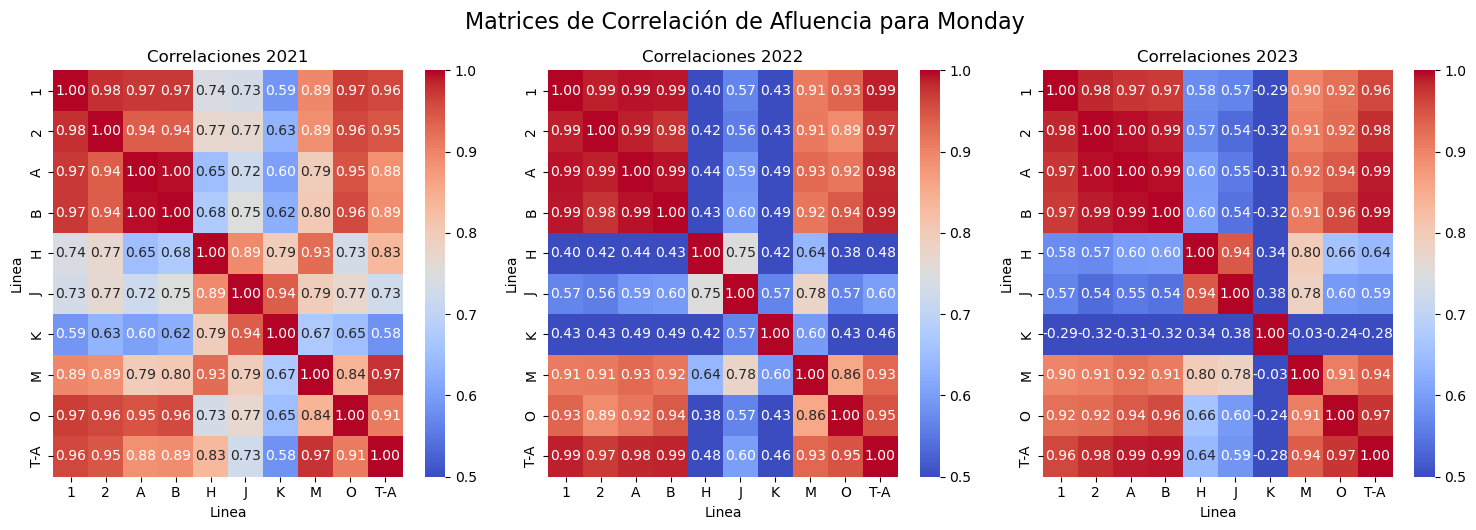

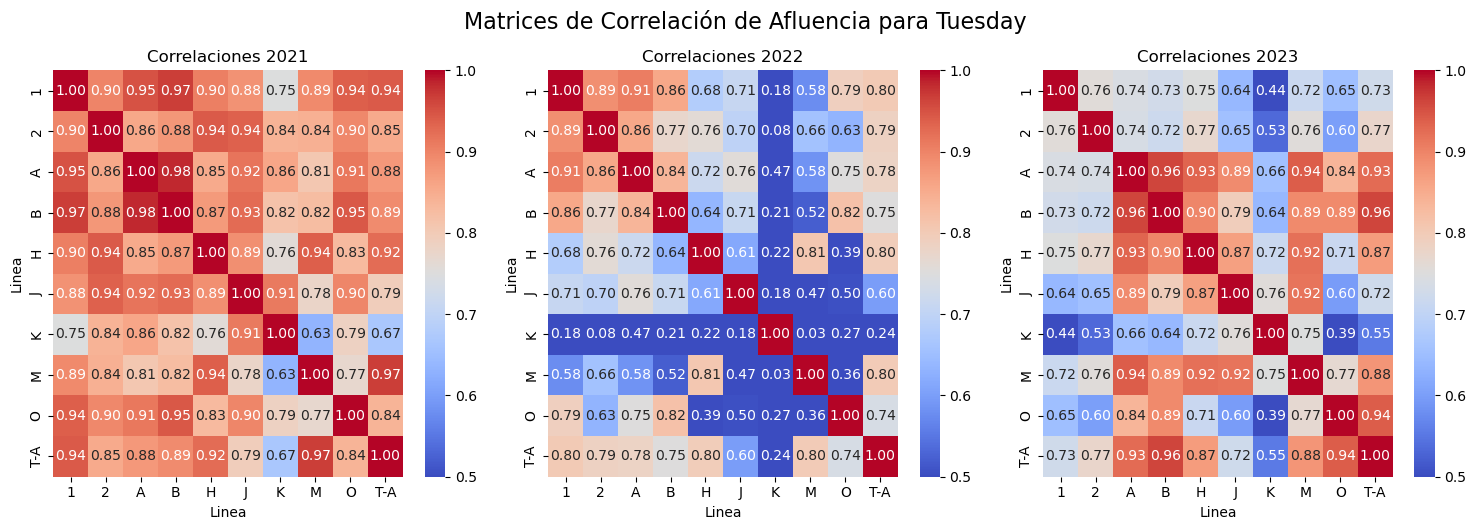

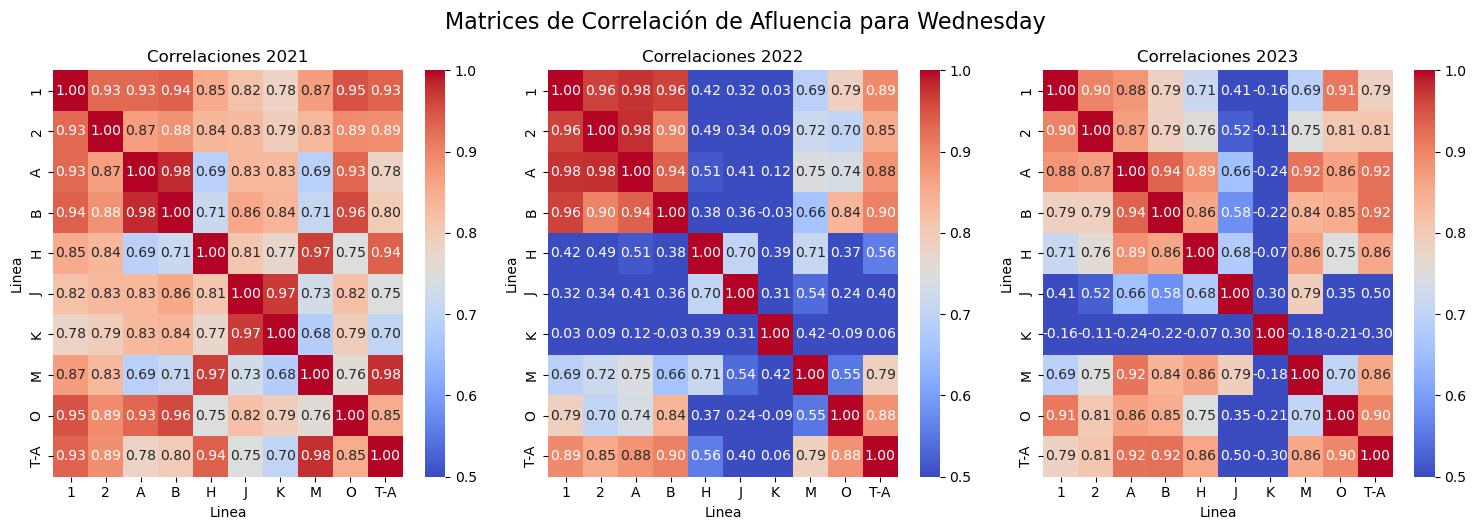

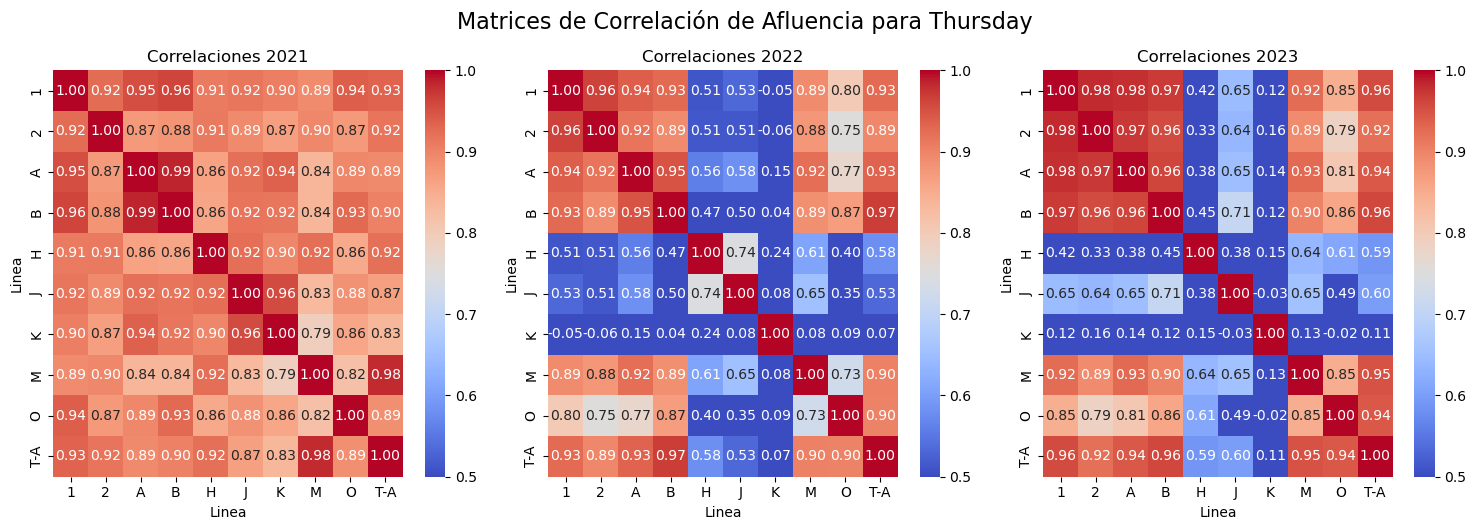

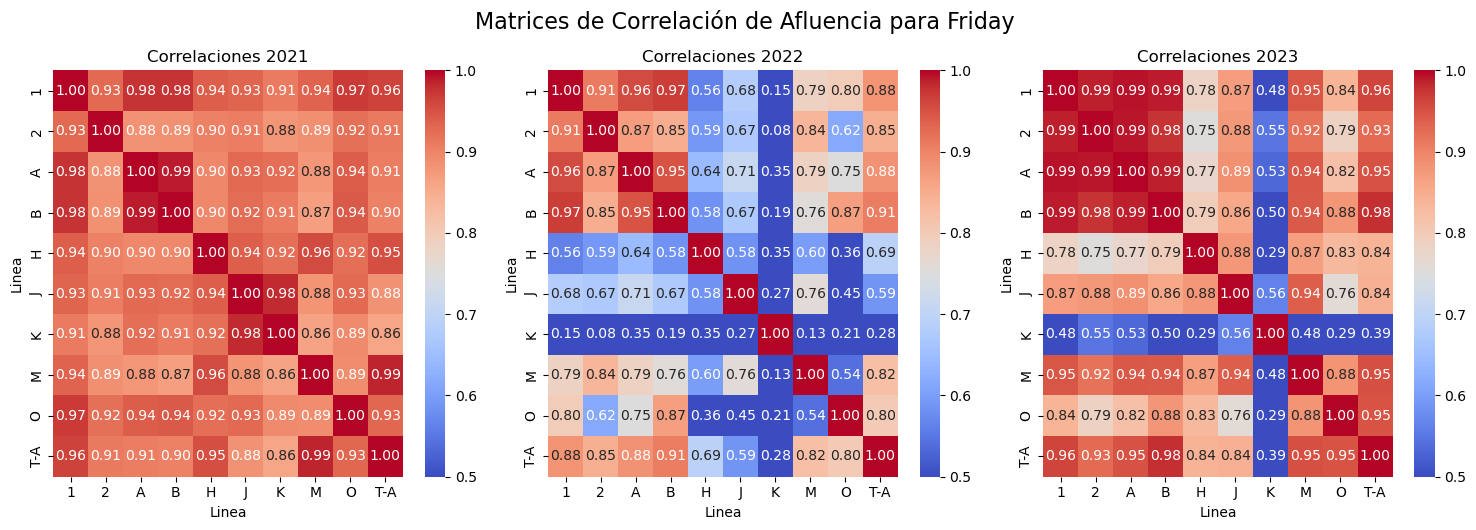

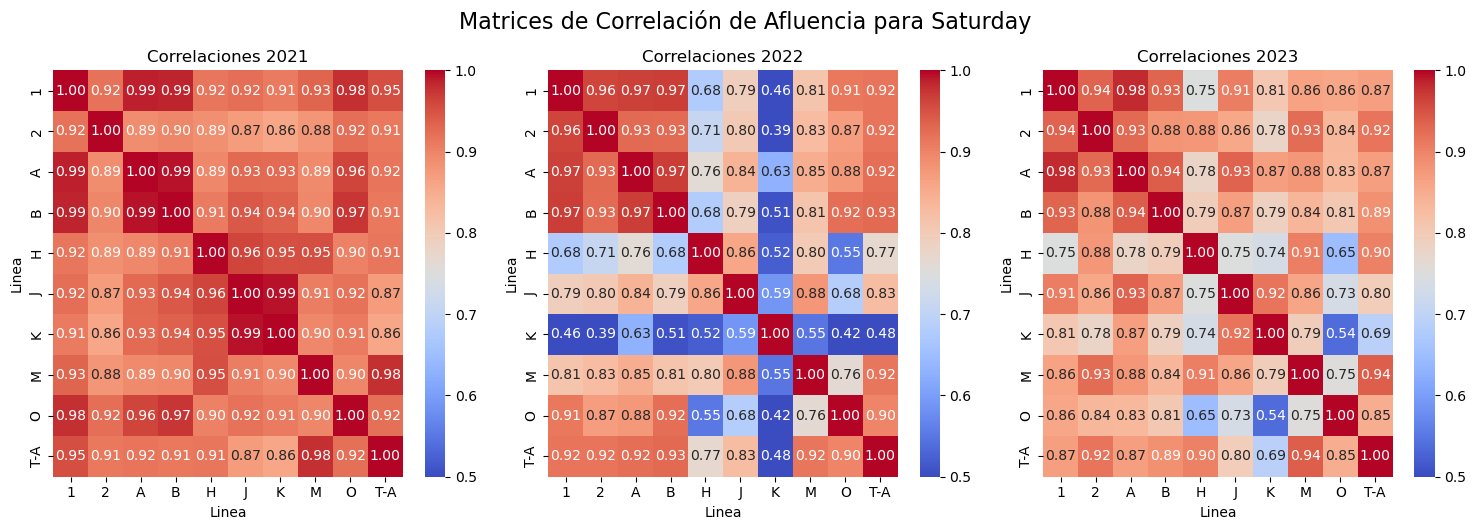

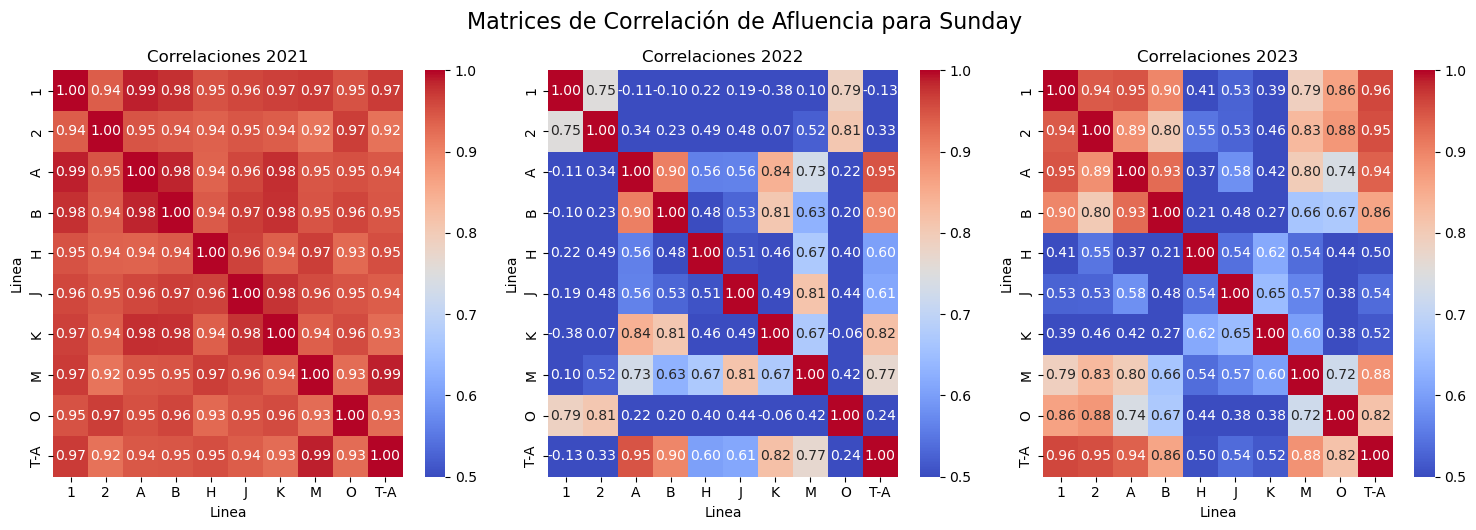

In [17]:
# Preparación de los datos
data['Fecha'] = pd.to_datetime(data['Fecha'])
data['Dia_semana'] = data['Fecha'].dt.day_name()
data['Año'] = data['Fecha'].dt.year

# Agrupación y pivoteo de los datos por año, día de la semana, línea del metro y fecha
afluencia_por_dia_y_año = data.groupby(['Año', 'Dia_semana', 'Linea', 'Fecha']).agg({'Qty_passangers': 'sum'}).reset_index()

# Obtener la lista de años y días de la semana
años = afluencia_por_dia_y_año['Año'].unique()
orden_dias = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Creando gráficos para cada día de la semana
for dia in orden_dias:
    fig, axes = plt.subplots(nrows=1, ncols=len(años), figsize=(15, 5))
    axes = axes.flatten()  # Aplanando la matriz de ejes para iterar fácilmente si es necesario

    # Calculando y graficando las matrices de correlación para cada año
    for i, año in enumerate(años):
        # Filtrando los datos para el año y día específicos
        data_año_dia = afluencia_por_dia_y_año[(afluencia_por_dia_y_año['Año'] == año) & (afluencia_por_dia_y_año['Dia_semana'] == dia)]

        # Pivotando los datos
        pivot_dia = data_año_dia.pivot_table(index='Fecha', columns='Linea', values='Qty_passangers')

        # Calculando la matriz de correlación para el día
        correlacion = pivot_dia.corr()

        # Graficando la matriz de correlación
        sns.heatmap(correlacion, ax=axes[i], annot=True, fmt=".2f", cmap="coolwarm", vmin=0.5, vmax=1)
        axes[i].set_title(f"Correlaciones {año}")

    # Ajustando el layout
    plt.tight_layout()
    plt.suptitle(f"Matrices de Correlación de Afluencia para {dia}", fontsize=16, y=1.05)
    plt.show()
